## Part-of-Speech tagging, N-grams & Plotting

## Assignment

Use the same text as last week (Wizard of Oz books from Gutenberg), or find and use another text source with at least 6 documents.  Make sure to clean up the text (lowercase, remove stopwords, etc) before looking for n-grams.
1.	Perform part of speech tagging.   Bonus: What are some of the most frequently-used nouns and verbs?
2.	Count 2-grams, 3-grams, and 4-grams instead of words (1-grams). Plot the Zipfian distribution of the n-grams. What are the top 20 phrases for the 2-grams?  Are 3- and 4-grams even useful here?
3.	Create word clouds of the n-grams.
4.	Choose some n-grams, and find the top most similar n-grams of the same length.  You could use string similarity, like Levenshtein distance, or you could use semantic similarity, like topic modeling (e.g. LSA), or you could use the .similarity() function from spaCy in Python, which uses word embeddings.
5.	Bonus:  Look for interesting word collocations in your texts.  In NLTK (Python) this is under nltk.collocations. NLTK uses PMI (https://en.wikipedia.org/wiki/Pointwise_mutual_information) to find rare word collocations.


## Imports

In [1]:
import re  # python's regular expression package
import string #string operations
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize #Tokeningation
from nltk.corpus import stopwords #stop words
from nltk.stem import WordNetLemmatizer #lemmatization
from nltk import FreqDist #frequency distribution
import matplotlib.pyplot as plt #plotting
from nltk import pos_tag #Part of speech tagging
from nltk import bigrams, trigrams, ngrams #bigrams, trigrams and n-grams
from wordcloud import WordCloud #for creating word clouds
from nltk.corpus import wordnet as wn #for finding similarity between words
from nltk.collocations import * #for bigram etc. collocation finders and associatution measures

## Functions

In [2]:
def read(filepath):
    """Reads a text file and returns it as a string"""
    with open(filepath) as f:      
        return f.read()

In [3]:
def extract(raw_text):
    """Receives raw text as input, removes header and footer and returns content of the original book """
    regex = re.compile(r'\*\*\*(START|END)(.*)\*\*\*') #compile regex
    regex.findall(raw_text) #find all lines starting with ***START or ***END
    #find location of the strings marking the beginning and the end of the book
    mo = regex.search(raw_text) #match object for the first string
    start = mo.end() + 1  #Start where the ***START OF THE BOOK String ends
    mo = regex.search(raw_text, pos=start) #Perform second search begining where the first search ended 
    #mo (match object) contains the second string
    end = mo.start() #mark end of the main text at the begginning of the second string
    # slice out the content of the book (text between the two strings)
    book = raw_text[start:end+1] #book contains the main text
    return book


In [4]:
def tokenize_nostops(book_text):
    """Returns a list of cleaned, stemmed tokens"""
    #Tokenize into words and change to lower case
    tokens_lower = [word.lower() for word in word_tokenize(book_text)]
    # remove punctation 
    string.punctuation
    tokens_nopunct = [word for word in tokens_lower if word not in string.punctuation]
    #remove stop words
    stop_words = stopwords.words('english') #list of stop words
    tokens_nostop = [word for word in tokens_nopunct if word not in stop_words]
    #Lemmatization
    wnl = WordNetLemmatizer()
    tokens_nostop_lem  = [wnl.lemmatize(word) for word in tokens_nostop if word.isalpha()] #lemmatize only words with all aphapetic characters
    return tokens_nostop_lem


## Main

In [5]:
# path to the text file relative to the python script file 
filepath = 'wizard-of-oz.txt'
#Read the file from the disk
raw=read(filepath) #Call the read() function
#Display a slice of the text to make sure it is loaded correctly
raw[:800]

'ï»¿The Project Gutenberg eBook, Little Wizard Stories of Oz, by L. Frank\nBaum, Illustrated by John R. Neill\n\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\n\n\n\nTitle: Little Wizard Stories of Oz\n\n\nAuthor: L. Frank Baum\n\n\n\nRelease Date: May 19, 2008  [eBook #25519]\n\nLanguage: English\n\nCharacter set encoding: ISO-646-US (US-ASCII)\n\n\n***START OF THE PROJECT GUTENBERG EBOOK LITTLE WIZARD STORIES OF OZ***\n\n\nE-text prepared by Chris Curnow, Joseph Cooper, Greg Bergquist, and the\nProject Gutenberg Online Distributed Proofreading Team\n(http://www.pgdp.net)\n\n\n\nNote: Project Gutenberg also has an HT'

In [6]:
#Extract the main text of the book from the file
book_text=extract(raw) 
#Display a slice of the text to validate the result
book_text[:800]



'\n\nE-text prepared by Chris Curnow, Joseph Cooper, Greg Bergquist, and the\nProject Gutenberg Online Distributed Proofreading Team\n(http://www.pgdp.net)\n\n\n\nNote: Project Gutenberg also has an HTML version of this file which\n      includes the many lovely original colored illustrations.\n      See 25519-h.htm or 25519-h.zip:\n      (http://www.gutenberg.net/dirs/2/5/5/1/25519/25519-h/25519-h.htm)\n      or\n      (http://www.gutenberg.net/dirs/2/5/5/1/25519/25519-h.zip)\n\n\n\n\n\n[Illustration: THIS BOOK BELONGS TO]\n\n[Illustration]\n\nLITTLE WIZARD STORIES OF OZ\n\nby\n\nL. FRANK BAUM\n\nIllustrated by John R. Neill\n\n\n\n\n\n\n\nLittle\nWizard\nStories\nof Oz\n\n\n\n\nContents\n\n\n  The Cowardly Lion and the Hungry Tiger       15\n\n  Little Dorothy and Toto                      39\n\n  Tiktok and the Nome King                  '

In [7]:
#Text cleaning - resulting list of tokens without stop words
cleantokens_nostops = tokenize_nostops(book_text)
#Display partial results to check correctness
cleantokens_nostops[100:150]

['occasion',
 'grouped',
 'important',
 'personage',
 'oz',
 'scarecrow',
 'jack',
 'pumpkinhead',
 'tiktok',
 'clockwork',
 'man',
 'tin',
 'woodman',
 'wizard',
 'oz',
 'shaggy',
 'man',
 'famous',
 'fairy',
 'people',
 'little',
 'dorothy',
 'usually',
 'seat',
 'ozma',
 'foot',
 'crouched',
 'either',
 'side',
 'throne',
 'two',
 'enormous',
 'beast',
 'known',
 'hungry',
 'tiger',
 'cowardly',
 'lion',
 'illustration',
 'two',
 'beast',
 'ozma',
 'chief',
 'guardian',
 'everyone',
 'love',
 'beautiful',
 'girl',
 'princess',
 'never']

## Part-of-Speech (POS) tagging

In [8]:
#Perform part of speech tagging on cleaned list of token words
pos_words= pos_tag(cleantokens_nostops, tagset='universal')
#Display first 20 words with tags to check results
pos_words[:20]

[('prepared', 'ADJ'),
 ('chris', 'NOUN'),
 ('curnow', 'NOUN'),
 ('joseph', 'VERB'),
 ('cooper', 'ADJ'),
 ('greg', 'ADJ'),
 ('bergquist', 'NOUN'),
 ('project', 'NOUN'),
 ('gutenberg', 'X'),
 ('online', 'NOUN'),
 ('distributed', 'VERB'),
 ('proofreading', 'VERB'),
 ('team', 'NOUN'),
 ('http', 'NOUN'),
 ('note', 'NOUN'),
 ('project', 'NOUN'),
 ('gutenberg', 'NOUN'),
 ('also', 'ADV'),
 ('html', 'ADJ'),
 ('version', 'NOUN')]

In [9]:
#Find most common (word, tag) combinations (for all parts of speech)
pos_words_fd = FreqDist(pos_words)
common_pos= pos_words_fd.most_common()
common_pos[:20]

[(('said', 'VERB'), 73),
 (('one', 'NUM'), 58),
 (('illustration', 'NOUN'), 55),
 (('little', 'ADJ'), 50),
 (('man', 'NOUN'), 45),
 (('head', 'NOUN'), 39),
 (('would', 'VERB'), 37),
 (('jack', 'NOUN'), 31),
 (('tin', 'NOUN'), 29),
 (('scarecrow', 'NOUN'), 28),
 (('lion', 'NOUN'), 28),
 (('upon', 'ADP'), 28),
 (('could', 'VERB'), 28),
 (('eye', 'NOUN'), 25),
 (('tiger', 'NOUN'), 24),
 (('wizard', 'NOUN'), 24),
 (('good', 'ADJ'), 24),
 (('king', 'NOUN'), 21),
 (('two', 'NUM'), 21),
 (('made', 'VERB'), 21)]

In [10]:
# challenge: function tinfding the most common words by part of speech

def find_most_common(fd, pos, num=10):
    """Find the most common part of speech in an NLTK FreqDist and return a list with given length"""
    tup_fd = nltk.FreqDist(tup for (tup, count) in fd)
    part_list = [word for (word, part) in tup_fd if pos in part]
    return part_list[:10]


In [11]:
# Find 10 most common verbs
found_verbs= find_most_common(common_pos, 'V')
found_verbs

['said',
 'would',
 'could',
 'made',
 'must',
 'found',
 'asked',
 'king',
 'away',
 'back']

In [12]:
# Find 10 most common nouns
found_nouns = find_most_common(common_pos, 'N')
found_nouns

['one',
 'illustration',
 'man',
 'head',
 'jack',
 'tin',
 'scarecrow',
 'lion',
 'eye',
 'tiger']

## N-Grams


In [13]:
# count bigrams
bigrams= [tok for tok in bigrams(cleantokens_nostops)]
len(bigrams)

5507

In [14]:
# count trigrams
trigrams= [tok for tok in trigrams(cleantokens_nostops)]
len(trigrams)

5506

In [15]:
# count 4-grams
fourgrams = ngrams(cleantokens_nostops, 4)
len(list(fourgrams))


5505

In [16]:
#Display first 10 bigrams
bigrams[:10]


[('prepared', 'chris'),
 ('chris', 'curnow'),
 ('curnow', 'joseph'),
 ('joseph', 'cooper'),
 ('cooper', 'greg'),
 ('greg', 'bergquist'),
 ('bergquist', 'project'),
 ('project', 'gutenberg'),
 ('gutenberg', 'online'),
 ('online', 'distributed')]

In [17]:
#Display forst 10 trigrams
trigrams[:10]


[('prepared', 'chris', 'curnow'),
 ('chris', 'curnow', 'joseph'),
 ('curnow', 'joseph', 'cooper'),
 ('joseph', 'cooper', 'greg'),
 ('cooper', 'greg', 'bergquist'),
 ('greg', 'bergquist', 'project'),
 ('bergquist', 'project', 'gutenberg'),
 ('project', 'gutenberg', 'online'),
 ('gutenberg', 'online', 'distributed'),
 ('online', 'distributed', 'proofreading')]

In [18]:
# create a frequency distribution for bigrams
fd_bigrams = FreqDist(bigrams)

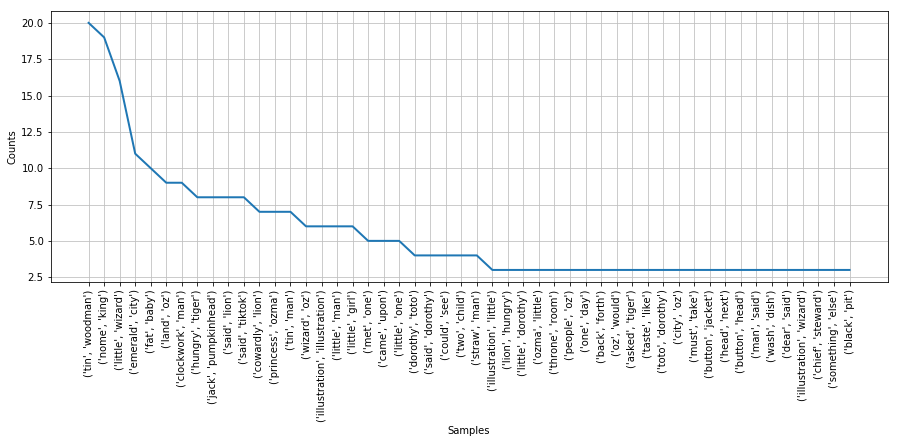

In [19]:
# plot frequency distribution for bigrams
plt.figure(figsize=(15, 5))
fd_bigrams.plot(50)

The graph above shows that bigrams in this text do not follow Zipfian distribution. For example, the most popular bigram (tin, woodman) is reteated 20 times in the book. According to Zipfian distrbtuion, we would expect to encounter the second popular bigram about 10 times, but it is used 19 times. The thrid popular bigram is found 16 times instead of about 7.

In [20]:
#Display 20 most common bigrams
fd_bigrams.most_common(20)

[(('tin', 'woodman'), 20),
 (('nome', 'king'), 19),
 (('little', 'wizard'), 16),
 (('emerald', 'city'), 11),
 (('fat', 'baby'), 10),
 (('land', 'oz'), 9),
 (('clockwork', 'man'), 9),
 (('hungry', 'tiger'), 8),
 (('jack', 'pumpkinhead'), 8),
 (('said', 'lion'), 8),
 (('said', 'tiktok'), 8),
 (('cowardly', 'lion'), 7),
 (('princess', 'ozma'), 7),
 (('tin', 'man'), 7),
 (('wizard', 'oz'), 6),
 (('illustration', 'illustration'), 6),
 (('little', 'man'), 6),
 (('little', 'girl'), 6),
 (('met', 'one'), 5),
 (('came', 'upon'), 5)]

In [21]:
#Display 20 most common trigrams
fd_trigrams = FreqDist(trigrams)
fd_trigrams.most_common(20)

[(('cowardly', 'lion', 'hungry'), 3),
 (('lion', 'hungry', 'tiger'), 3),
 (('ozma', 'little', 'wizard'), 3),
 (('emerald', 'city', 'oz'), 3),
 (('little', 'wizard', 'oz'), 3),
 (('illustration', 'little', 'wizard'), 2),
 (('little', 'wizard', 'story'), 2),
 (('wizard', 'story', 'oz'), 2),
 (('little', 'dorothy', 'toto'), 2),
 (('tiktok', 'nome', 'king'), 2),
 (('jack', 'pumpkinhead', 'sawhorse'), 2),
 (('scarecrow', 'tin', 'woodman'), 2),
 (('tin', 'woodman', 'illustration'), 2),
 (('palace', 'emerald', 'city'), 2),
 (('center', 'fairy', 'land'), 2),
 (('fairy', 'land', 'oz'), 2),
 (('great', 'throne', 'room'), 2),
 (('princess', 'ozma', 'ruler'), 2),
 (('tiktok', 'clockwork', 'man'), 2),
 (('hungry', 'tiger', 'cowardly'), 2)]

In [22]:
#Display 20 most common fourgrams
fd_fourgrams = FreqDist(ngrams(cleantokens_nostops, 4))
fd_fourgrams.most_common(20)

[(('cowardly', 'lion', 'hungry', 'tiger'), 3),
 (('little', 'wizard', 'story', 'oz'), 2),
 (('center', 'fairy', 'land', 'oz'), 2),
 (('hungry', 'tiger', 'cowardly', 'lion'), 2),
 (('dorothy', 'little', 'kansa', 'girl'), 2),
 (('prepared', 'chris', 'curnow', 'joseph'), 1),
 (('chris', 'curnow', 'joseph', 'cooper'), 1),
 (('curnow', 'joseph', 'cooper', 'greg'), 1),
 (('joseph', 'cooper', 'greg', 'bergquist'), 1),
 (('cooper', 'greg', 'bergquist', 'project'), 1),
 (('greg', 'bergquist', 'project', 'gutenberg'), 1),
 (('bergquist', 'project', 'gutenberg', 'online'), 1),
 (('project', 'gutenberg', 'online', 'distributed'), 1),
 (('gutenberg', 'online', 'distributed', 'proofreading'), 1),
 (('online', 'distributed', 'proofreading', 'team'), 1),
 (('distributed', 'proofreading', 'team', 'http'), 1),
 (('proofreading', 'team', 'http', 'note'), 1),
 (('team', 'http', 'note', 'project'), 1),
 (('http', 'note', 'project', 'gutenberg'), 1),
 (('note', 'project', 'gutenberg', 'also'), 1)]

Trigrams and fourgrams' distributions are even further away from the Zipfian distriibution.  The most popular trigram and fourgrams are found in the text only 3 times each. So, Zipfian distribution is not useful for analysing text in this case. 

## Create a Wordcloud



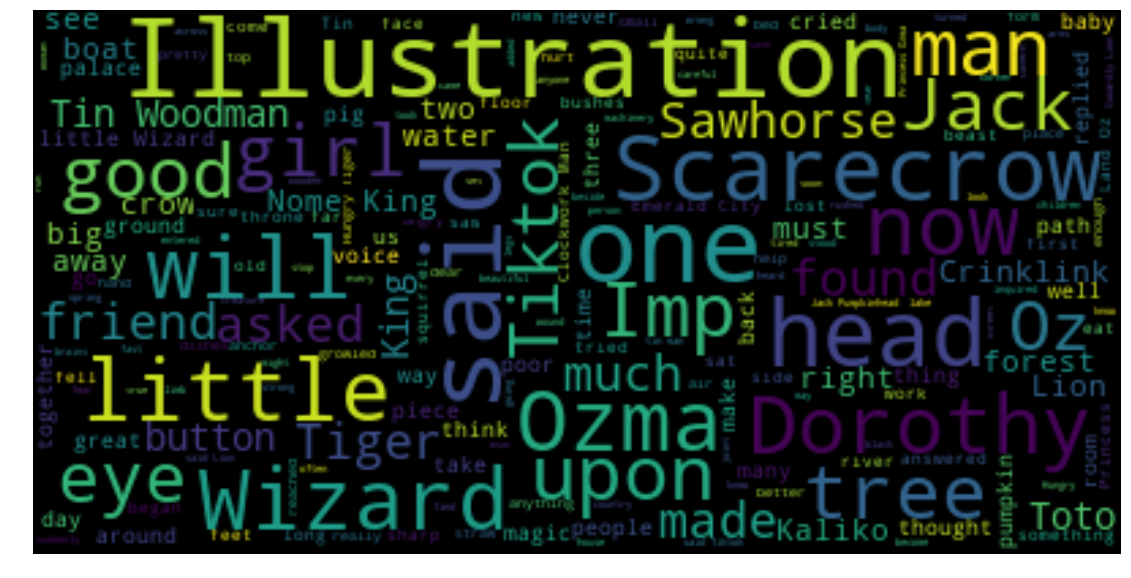

In [23]:
#The following word cloud ewxample was adapted from: https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py 

#Creating word cloud to visually present the most popular n-grams in the test

import os
from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Generate a word cloud image using the full cleaned text of the book
wordcloud = WordCloud().generate(book_text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(book_text)
# make your figure larger and turn off the axes
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


## Similarity


In [24]:
# find the synset for 'woodman'
woodman_syn = wn.synsets('woodman')
woodman_syn

[Synset('woodsman.n.01'), Synset('woodworker.n.01')]

The sysnet for "woodman" includes 2 words - woodsman and woodworker.

In [25]:
# find the synset for 'man'
man_syn = wn.synsets('man')
man_syn

[Synset('man.n.01'),
 Synset('serviceman.n.01'),
 Synset('man.n.03'),
 Synset('homo.n.02'),
 Synset('man.n.05'),
 Synset('man.n.06'),
 Synset('valet.n.01'),
 Synset('man.n.08'),
 Synset('man.n.09'),
 Synset('man.n.10'),
 Synset('world.n.08'),
 Synset('man.v.01'),
 Synset('man.v.02')]

The sysnet for "man" is larger - 13 options.

In [26]:
# extract similarity on sysnet for nthe first elements for woodman and man
woodman = woodman_syn[0]
woodman.path_similarity(man_syn[0])

0.16666666666666666

The similarity score using path_similarity is relatively low - 0.16(6).

In [27]:
# Use nested for loops to compare the each synset of woodman and man
for wm in woodman_syn:
    for m in man_syn:
        score = wm.path_similarity(m)
        print("Similarity  score for : ", wm, "and ", m, " is ", score, ".")
                

Similarity  score for :  Synset('woodsman.n.01') and  Synset('man.n.01')  is  0.16666666666666666 .
Similarity  score for :  Synset('woodsman.n.01') and  Synset('serviceman.n.01')  is  0.14285714285714285 .
Similarity  score for :  Synset('woodsman.n.01') and  Synset('man.n.03')  is  0.2 .
Similarity  score for :  Synset('woodsman.n.01') and  Synset('homo.n.02')  is  0.07692307692307693 .
Similarity  score for :  Synset('woodsman.n.01') and  Synset('man.n.05')  is  0.125 .
Similarity  score for :  Synset('woodsman.n.01') and  Synset('man.n.06')  is  0.16666666666666666 .
Similarity  score for :  Synset('woodsman.n.01') and  Synset('valet.n.01')  is  0.125 .
Similarity  score for :  Synset('woodsman.n.01') and  Synset('man.n.08')  is  0.16666666666666666 .
Similarity  score for :  Synset('woodsman.n.01') and  Synset('man.n.09')  is  0.1 .
Similarity  score for :  Synset('woodsman.n.01') and  Synset('man.n.10')  is  0.08333333333333333 .
Similarity  score for :  Synset('woodsman.n.01') a

As the output above shows,  overall similarity scored are relatively low, they range from none to 0.2. The pair that has the highest similarity score equal to 0.2 is  Synset('woodsman.n.01') and  Synset('man.n.03').  

## Collocations (Optional Bonus)


In [28]:
#Find bigrams collocations in text
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(cleantokens_nostops)
scored = finder.score_ngrams(bigram_measures.raw_freq)
collocation2 =sorted(bigram for bigram, score in scored)  
#display first 15 collocations found
collocation2[:15]

[('able', 'discover'),
 ('able', 'get'),
 ('aboard', 'corncob'),
 ('aboard', 'tie'),
 ('abounded', 'entered'),
 ('accident', 'knew'),
 ('accident', 'new'),
 ('accidentally', 'found'),
 ('accompany', 'glad'),
 ('accomplish', 'mean'),
 ('accomplish', 'task'),
 ('accomplished', 'nothing'),
 ('accustomed', 'take'),
 ('across', 'back'),
 ('across', 'black')]

In [29]:
# find trigrams collocations
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = TrigramCollocationFinder.from_words(cleantokens_nostops)
scored3 = finder.score_ngrams(trigram_measures.raw_freq)
set(trigram for trigram, score in scored3) == set(nltk.trigrams(cleantokens_nostops))
#Display top 15 results
sorted(finder3.nbest(trigram_measures.raw_freq, 15))


[('bag', 'magic', 'tool'),
 ('carved', 'face', 'stuck'),
 ('center', 'fairy', 'land'),
 ('cowardly', 'lion', 'hungry'),
 ('dear', 'said', 'jack'),
 ('dorothy', 'little', 'kansa'),
 ('eat', 'fat', 'baby'),
 ('emerald', 'city', 'oz'),
 ('eye', 'could', 'see'),
 ('fairy', 'land', 'oz'),
 ('fat', 'baby', 'taste'),
 ('gently', 'back', 'forth'),
 ('lion', 'hungry', 'tiger'),
 ('little', 'wizard', 'oz'),
 ('ozma', 'little', 'wizard')]